<a href="https://colab.research.google.com/github/cgangwar11/Coding-Practice/blob/master/practice_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://download.pytorch.org/tutorial/data.zip

--2019-03-27 11:53:33--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 99.84.239.42, 99.84.239.67, 99.84.239.54, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.84.239.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.1s    

2019-03-27 11:53:33 (24.3 MB/s) - ‘data.zip’ saved [2882130/2882130]



In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [3]:
!ls data/

eng-fra.txt  names


### Data Preprocessing


In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import *

In [0]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [0]:
import glob
import unicodedata
import string




In [0]:
file_list = glob.glob('data/names/*.txt')

In [0]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [0]:
file = open(file_list[0],'r')

In [0]:
out = list(file.readlines())

In [0]:
def readlines(filename):
    out = open(filename).read().strip().split('\n')
    return [unicode_to_ascii(i) for i in out]



In [0]:
all_categories = []
names = {}
category_to_int = {}
for file in file_list:
    category = file.split('/')[-1].split('.txt')[0]
    category = category.strip().lower()
    names[category] = readlines(file)
    all_categories.append(category)

In [0]:
category_to_int = {j:i for i,j in enumerate(all_categories)}
all_letters_to_int = {j:i for i,j in enumerate(all_letters)}
def category_to_tensor(i):
    out=torch.zeros(1,len(all_categories))
    out[0,category_to_int[i]]=1
    return out

def word_to_tensor(word):
    out = []
    for i in range(15):
        try:
            out.append(all_letters_to_int[word[i]])
        except:
            out.append(52)
        
    return torch.LongTensor(out).view(1,len(out),-1)
        
        

In [0]:
class RNN(nn.Module):
    def __init__(self,num_embedding,embedding_dim,hidden_size):
        super(RNN,self).__init__()
        self.embedding = nn.Embedding(num_embeddings=num_embedding,embedding_dim=embedding_dim)
        self.rnn = nn.RNN(input_size = embedding_dim,hidden_size=hidden_size)
        self.linear = nn.Linear(hidden_size,len(all_categories))
        
    def forward(self,input):
        out = self.embedding(input)
        out = out.view(len(input),-1,len(all_letters))
        out,_ = self.rnn(out)
        
        out = out[:,-1,:]
        out = self.linear(F.relu(out))
        return F.softmax(out)
        

In [0]:
model = RNN(len(all_letters),len(all_letters),len(all_letters))

In [16]:
word_to_tensor('Saleem'),category_to_tensor('french')

(tensor([[[44],
          [ 0],
          [11],
          [ 4],
          [ 4],
          [12],
          [52],
          [52],
          [52],
          [52],
          [52],
          [52],
          [52],
          [52],
          [52]]]),
 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [0]:
pair = []
for key,value in names.items():
    for name in value:
        pair.append((key,name))

In [0]:
class NameLanguageDataset(Dataset):
    
    def __init__(self,pair):
        self.source = pair
        
    def __len__(self):
        return len(self.source)
    
    def __getitem__(self,idx):
        language,name = self.source[idx]
        return word_to_tensor(name),category_to_int[language]

In [0]:
data = NameLanguageDataset(pair)
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}

generator = DataLoader(data,**params)

In [0]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [37]:
los = []
for epoch in range(10):
    for X,y in generator:
        optimizer.zero_grad()
       # print(y,)
        out = model(X)
        #print(out.shape,y.view(64,18).shape)
        lossi = loss(out,y)
        los.append(lossi)
        lossi.backward()
        optimizer.step()
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


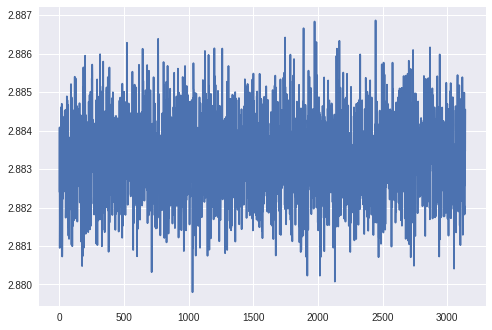

In [38]:
plt.plot(los)

TypeError: ignored

In [47]:
torch.zeros(5).long()

tensor([0, 0, 0, 0, 0])

In [32]:
torch.randint(10,(10,10))

tensor([[4, 0, 9, 8, 5, 6, 1, 9, 5, 9],
        [8, 1, 2, 8, 0, 5, 5, 6, 7, 5],
        [3, 2, 2, 6, 5, 7, 9, 5, 9, 0],
        [1, 0, 0, 4, 7, 5, 9, 0, 1, 9],
        [2, 4, 5, 0, 8, 6, 4, 7, 3, 7],
        [2, 9, 7, 4, 7, 5, 5, 6, 0, 6],
        [1, 8, 0, 5, 0, 4, 7, 0, 8, 8],
        [8, 7, 7, 6, 9, 0, 3, 8, 4, 3],
        [1, 9, 3, 2, 6, 2, 2, 8, 1, 6],
        [7, 6, 0, 5, 4, 7, 2, 7, 9, 4]])

In [99]:
model(data[0][0]),data[0][1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


(tensor([[0.0462, 0.0398, 0.0594, 0.0694, 0.0594, 0.0669, 0.0599, 0.0767, 0.0422,
          0.0695, 0.0453, 0.0515, 0.0442, 0.0543, 0.0457, 0.0542, 0.0367, 0.0787]],
        grad_fn=<SoftmaxBackward>),
 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [0]:
print(all_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'


In [0]:
model = RNN(27,5,5)

In [0]:
model(torch.LongTensor([[5,6,7,8],[10,1,2,4]])).shape

torch.Size([2, 5])